In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
table1 = pd.read_csv('table1_user.csv')
table2 = pd.read_csv('table2_jd.csv')
table3 = pd.read_csv('table3_action.csv')

In [3]:
#删除未浏览数据
table3_index = table3[table3["browsed"] == 0].index
table3.drop(table3_index, axis = 0, inplace=True)
table3.drop(columns = ['browsed'],inplace = True)

In [4]:
#转换招聘数据学历数据类型
a=table2['min_edu_level'].values
l=[]
for i in a:
    if i in l:
        continue
    else:
        l.append(i)
print(l)
table2['min_edu_level']=table2['min_edu_level'].map({'初中 ':1,'高中 ':2,'中专':2,'中技 ':2,'大专 ':3,'本科':4,'硕士 ':5,'博士 ':6,'\\N':4,'请选择':4,'|置业顾问':4})

['本科', '大专 ', '\\N', '中专', '中技 ', '硕士 ', '高中 ', '初中 ', '博士 ', '请选择', '|置业顾问']


In [5]:
#计算招聘期限
table2['period']=table2['end_date']-table2['start_date']
table2=table2.drop(columns=['end_date','start_date'])
#删除公司名
table2=table2.drop(columns=['company_name','key','max_edu_level','is_mangerial','resume_language_required'])
#修改出差变量异常值
for i in range(table2.shape[0]):
    if table2['is_travel'].iloc[i] == 2 :
        table2['is_travel'][i]=1

In [6]:
#转换简历数据学历数据类型
a=table1['cur_degree_id'].values
l=[]
for i in a:
    if i in l:
        continue
    else:
        l.append(i)
print(l)

table1['cur_degree_id']=table1['cur_degree_id'].map({'初中':1,'高中':2,'中专':2,'中技':2,'大专':3,'本科':4,'硕士':5,'MBA':5,'EMBA':5,'博士':6})

['大专', '本科', nan, '中专', 'MBA', '高中', '硕士', '其他', '中技', '初中', 'EMBA', '博士']


In [7]:
table1['start_work_date'].replace('-', '2019', inplace=True)
table1['start_work_date'] = table1['start_work_date'].map(lambda x: 2019-int(x))

In [8]:
#合并关联三张表格
table=pd.merge(table3,table2,left_on='jd_no',right_on='jd_no')
table=pd.merge(table,table1,left_on='user_id',right_on='user_id')

In [9]:
table = table.drop_duplicates(subset=None, keep='first')
table = table.reset_index()
table

,index,user_id,jd_no,delivered,satisfied,列1,jd_title,city,jd_sub_type,require_nums,...,desire_jd_industry_id,desire_jd_type_id,desire_jd_salary_id,cur_industry_id,cur_jd_type,cur_salary_id,cur_degree_id,birthday,start_work_date,experience
0,0,17e1b9f107dd1214bd78dec6d91593a4,dda657439fe72a592b523596453f0290,0,0,719.0,预算员造价员,551,工程造价/预结算,2,...,房地产/建筑/建材/工程,工程造价/预结算,100002000.0,房地产/建筑/建材/工程,土木/建筑/装修/市政工程,0200104000,3.0,24,2,停车|现场|凤凰|预算编制|建设|实习|专家|公园|预算软件|勘察|合同|知识|商务|单位|...
1,1,17e1b9f107dd1214bd78dec6d91593a4,7de64630e8869c50f2e3aa5b7c4fe86c,1,1,719.0,后勤文员/行政班/五险一金,551,行政专员/助理,1,...,房地产/建筑/建材/工程,工程造价/预结算,100002000.0,房地产/建筑/建材/工程,土木/建筑/装修/市政工程,0200104000,3.0,24,2,停车|现场|凤凰|预算编制|建设|实习|专家|公园|预算软件|勘察|合同|知识|商务|单位|...
2,2,17e1b9f107dd1214bd78dec6d91593a4,60ab4639bad70e9f92ff261f9b243aec,0,0,719.0,土建造价人员,551,工程造价/预结算,5,...,房地产/建筑/建材/工程,工程造价/预结算,100002000.0,房地产/建筑/建材/工程,土木/建筑/装修/市政工程,0200104000,3.0,24,2,停车|现场|凤凰|预算编制|建设|实习|专家|公园|预算软件|勘察|合同|知识|商务|单位|...
3,3,17e1b9f107dd1214bd78dec6d91593a4,0696c44a4c19ba7bd60bed1e2fda5c7d,1,1,719.0,档案资料员/实习生+周末双休,551,文档/资料管理,2,...,房地产/建筑/建材/工程,工程造价/预结算,100002000.0,房地产/建筑/建材/工程,土木/建筑/装修/市政工程,0200104000,3.0,24,2,停车|现场|凤凰|预算编制|建设|实习|专家|公园|预算软件|勘察|合同|知识|商务|单位|...
4,4,17e1b9f107dd1214bd78dec6d91593a4,afacb98717e39ef19af9c9f3dc40e302,1,1,719.0,造价资料员,551,工程造价/预结算,1,...,房地产/建筑/建材/工程,工程造价/预结算,100002000.0,房地产/建筑/建材/工程,土木/建筑/装修/市政工程,0200104000,3.0,24,2,停车|现场|凤凰|预算编制|建设|实习|专家|公园|预算软件|勘察|合同|知识|商务|单位|...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133059,139795,26501debdeb22a8a3c612c5e70ee6423,3a6e9dcbbf8832979f15c061f1719003,1,0,538.0,幼教培训师,704,幼教,14,...,"房地产/建筑/建材/工程,银行,教育/培训/院校","培训/招生/课程顾问,幼教,教学/教务管理人员",200104000.0,房地产/建筑/建材/工程,教育/培训,0200104000,3.0,21,1,教师|幼教|销售代表
133060,139796,00ce80c3522eb2d45d14083e8620372a,62db29a3b6ed802b924aabdd36f8689c,1,0,NaN,旅游事业部合伙人,530,副总裁/副总经理,1,...,"旅游/度假,房地产/建筑/建材/工程,学术/科研","旅游/度假/出入境服务,高级管理,其他",0.0,旅游/度假,高级管理,0000001000,NaN,36,14,高速公路|游艇|模式|建设|休闲|设计方案|全景|谈判|金融资本|规划设计|人事|设备|乡村...
133061,139797,00ce80c3522eb2d45d14083e8620372a,2603722d87f2ab5ee356a1be1fe31624,1,0,NaN,项目运营副总,801,运营总监,3,...,"旅游/度假,房地产/建筑/建材/工程,学术/科研","旅游/度假/出入境服务,高级管理,其他",0.0,旅游/度假,高级管理,0000001000,NaN,36,14,高速公路|游艇|模式|建设|休闲|设计方案|全景|谈判|金融资本|规划设计|人事|设备|乡村...
133062,139798,00ce80c3522eb2d45d14083e8620372a,e3bb55258d57384bbf7880c255679a6d,1,1,NaN,平台运营,530,内容运营,1,...,"旅游/度假,房地产/建筑/建材/工程,学术/科研","旅游/度假/出入境服务,高级管理,其他",0.0,旅游/度假,高级管理,0000001000,NaN,36,14,高速公路|游艇|模式|建设|休闲|设计方案|全景|谈判|金融资本|规划设计|人事|设备|乡村...


In [10]:
table.to_csv('table.csv',encoding='utf_8_sig')

In [11]:
table.columns

Index(['index', 'user_id', 'jd_no', 'delivered', 'satisfied', '列1', 'jd_title',
       'city', 'jd_sub_type', 'require_nums', 'max_salary', 'min_salary',
       'is_travel', 'min_years', 'min_edu_level', 'job_description', 'period',
       'live_city_id', 'desire_jd_city_id', 'desire_jd_industry_id',
       'desire_jd_type_id', 'desire_jd_salary_id', 'cur_industry_id',
       'cur_jd_type', 'cur_salary_id', 'cur_degree_id', 'birthday',
       'start_work_date', 'experience'],
      dtype='object')

In [12]:
#选取结构化变量
data_num=table[['delivered','user_id','jd_no','satisfied','city','max_salary','min_salary','is_travel', 'min_years', 'min_edu_level','period','live_city_id', 'desire_jd_city_id','desire_jd_salary_id', 'cur_salary_id', 'cur_degree_id', 'birthday',
       'start_work_date']]
data_num

,delivered,user_id,jd_no,satisfied,city,max_salary,min_salary,is_travel,min_years,min_edu_level,period,live_city_id,desire_jd_city_id,desire_jd_salary_id,cur_salary_id,cur_degree_id,birthday,start_work_date
0,0,17e1b9f107dd1214bd78dec6d91593a4,dda657439fe72a592b523596453f0290,0,551,4000,2001,0,-1,3,102.0,551,"551,-,-",100002000.0,0200104000,3.0,24,2
1,1,17e1b9f107dd1214bd78dec6d91593a4,7de64630e8869c50f2e3aa5b7c4fe86c,1,551,4500,3000,1,-1,3,30.0,551,"551,-,-",100002000.0,0200104000,3.0,24,2
2,0,17e1b9f107dd1214bd78dec6d91593a4,60ab4639bad70e9f92ff261f9b243aec,0,551,7000,3500,1,305,3,102.0,551,"551,-,-",100002000.0,0200104000,3.0,24,2
3,1,17e1b9f107dd1214bd78dec6d91593a4,0696c44a4c19ba7bd60bed1e2fda5c7d,1,551,6000,3500,1,-1,3,9810.0,551,"551,-,-",100002000.0,0200104000,3.0,24,2
4,1,17e1b9f107dd1214bd78dec6d91593a4,afacb98717e39ef19af9c9f3dc40e302,1,551,4000,2500,0,-1,3,99.0,551,"551,-,-",100002000.0,0200104000,3.0,24,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133059,1,26501debdeb22a8a3c612c5e70ee6423,3a6e9dcbbf8832979f15c061f1719003,0,704,6000,4000,0,305,3,301.0,704,"704,-,-",200104000.0,0200104000,3.0,21,1
133060,1,00ce80c3522eb2d45d14083e8620372a,62db29a3b6ed802b924aabdd36f8689c,0,530,25000,15000,1,510,3,102.0,530,"530,-,-",0.0,0000001000,NaN,36,14
133061,1,00ce80c3522eb2d45d14083e8620372a,2603722d87f2ab5ee356a1be1fe31624,0,801,30000,20001,1,510,4,201.0,530,"530,-,-",0.0,0000001000,NaN,36,14
133062,1,00ce80c3522eb2d45d14083e8620372a,e3bb55258d57384bbf7880c255679a6d,1,530,15000,10001,0,103,3,9488.0,530,"530,-,-",0.0,0000001000,NaN,36,14


In [13]:
#确定薪资上下限
data_num['cur_salary_id_max']=data_num['cur_salary_id'].map({'0200104000':4000, 
                                                             '0400106000':6000, 
                                                             '0600108000':8000,
                                                             '1000115000':15000, 
                                                             '0800110000':10000, 
                                                             '0000001000':1000,
                                                             '2500199999':50000, 
                                                             '1500125000':25000, 
                                                             '0100002000':2000, 
                                                             '0000000000':np.NaN, 
                                                             '3500150000':50000,
                                                             '70001100000':100000,
                                                             '5000170000':70000, 
                                                             '100001150000':150000})
data_num['cur_salary_id_min']=data_num['cur_salary_id'].map({'0200104000':2001, 
                                                             '0400106000':4001, 
                                                             '0600108000':6001,
                                                             '1000115000':10001,
                                                             '0800110000':80001, 
                                                             '0000001000':0,
                                                             '2500199999':25001, 
                                                             '1500125000':15001,
                                                             '0100002000':1000,
                                                             '0000000000':np.NaN,
                                                             '3500150000':35001,
                                                             '70001100000':70001,
                                                             '5000170000':50001,
                                                             '100001150000':10000})
data_num=data_num.drop(columns =['cur_salary_id'])

In [14]:
data_num['desire_jd_salary_id']=data_num['desire_jd_salary_id'].astype(str)

data_num['desire_min_salary']=data_num['desire_jd_salary_id'].map({
    '100002000.0':1000,
    '400106000.0':4001, 
    '0.0':np.NaN, 
    '200104000.0':2001, 
    '600108000.0':6001, 
    '800110000.0':8001, 
    '1000115000.0':10001, 
    '2500199999.0':25000, 
    '1500125000.0':15001, 
    '3500150000.0':35000, 
    '70001100000.0':70000, 
    '1000.0':0, 
    '2500135000.0':25000, 
    '5000170000.0':50000})

data_num['desire_max_salary']=data_num['desire_jd_salary_id'].map({
    '100002000.0':2000,
    '400106000.0':6000, 
    '0.0':np.NaN, 
    '200104000.0':4000, 
    '600108000.0':8000, 
    '800110000.0':10000, 
    '1000115000.0':15000, 
    '2500199999.0':50000, 
    '1500125000.0':25000, 
    '3500150000.0':15000, 
    '70001100000.0':100000, 
    '1000.0':1000,  
    '2500135000.0':35000, 
    '5000170000.0':70000})

data_num=data_num.drop(columns =['desire_jd_salary_id'])

In [15]:
#删除现居住城市
data_num=data_num.drop(columns =['live_city_id'])

In [16]:
#生成教育水平相似度
data_num['edu_dif'] = data_num['cur_degree_id'] - data_num['min_edu_level']

In [17]:
print('缺失值个数:', np.isnan(data_num['edu_dif']).sum())

缺失值个数: 5196


In [18]:
#生成工作年限相似度
data_num['min_years'][data_num['min_years']==-1]=0
data_num['min_years']=data_num['min_years']//100
data_num=data_num.drop(columns ='cur_degree_id')
data_num=data_num.drop(columns = 'min_edu_level')

In [19]:
#期望薪资相似度&当前薪资相似度
data_num['max_desire_salary_dif'] = data_num['desire_max_salary'] - data_num['max_salary']
data_num['min_desire_salary_dif'] = data_num['desire_min_salary'] - data_num['min_salary']
data_num['max_cur_salary_dif'] = data_num['cur_salary_id_max'] - data_num['max_salary']
data_num['min_cur_salary_dif'] = data_num['cur_salary_id_min'] - data_num['min_salary']
data_num=data_num.drop(columns = 'max_salary')
data_num=data_num.drop(columns = 'min_salary')
data_num=data_num.drop(columns = 'desire_max_salary')
data_num=data_num.drop(columns = 'desire_min_salary')
data_num=data_num.drop(columns = 'cur_salary_id_max')
data_num=data_num.drop(columns = 'cur_salary_id_min')

In [20]:
#城市相似度
'''
data_num['desire_jd_city_id'] = data_num['desire_jd_city_id'].astype(str)
data_num['desire_jd_city_id'] = data_num['desire_jd_city_id'].str.split(',')
data_num['city'] = list(data_num['city'])
data_num['city']=data_num['city'].astype(str)
for i in data_num['city']:
    i = '\''+ i +'\''
data_num['city_match'] = 0
for i in range(data_num.shape[0]):
    for j in range(3):
        if data_num['desire_jd_city_id'][i][j] == data_num['city'][i]:
            data_num['city_match'] = 1
            '''
#以下代码与上述代码作用相同，但运行速度较慢            

data_num['city_match']=0
for i in range(data_num.shape[0]):
    if str(data_num['city'].iloc[i]) in data_num['desire_jd_city_id'].iloc[i]:
        data_num['city_match'][i]=1
    
data_num=data_num.drop(columns = 'city')
data_num=data_num.drop(columns = 'desire_jd_city_id')

In [21]:
#data_num.to_csv('data_num.csv',encoding='utf_8_sig')
data_num.columns

Index(['delivered', 'user_id', 'jd_no', 'satisfied', 'is_travel', 'min_years',
       'period', 'birthday', 'start_work_date', 'edu_dif',
       'max_desire_salary_dif', 'min_desire_salary_dif', 'max_cur_salary_dif',
       'min_cur_salary_dif', 'city_match'],
      dtype='object')

In [22]:
from sklearn.impute import KNNImputer
#select the numeric columns and transform it to numpy
n_train = data_num[['delivered','satisfied','is_travel','min_years','period','birthday','start_work_date','edu_dif','max_desire_salary_dif','min_desire_salary_dif','max_cur_salary_dif','min_cur_salary_dif','city_match']].to_numpy() 
imputer = KNNImputer(n_neighbors=2, weights="uniform")
print('处理前缺失值个数:', np.isnan(n_train).sum())
n_train_impute = imputer.fit_transform(n_train)
print('处理后缺失值个数:', np.isnan(n_train_impute).sum())
print('处理后各属性均值：', np.mean(n_train_impute,axis=0))

处理前缺失值个数: 42147
处理后缺失值个数: 0
处理后各属性均值： [ 4.60620453e-01  2.14889076e-01  3.35898515e-01  1.61005982e+00
  1.12588723e+03  2.84593729e+01  7.25610984e+00  1.59032496e-01
 -8.51110905e+02 -4.03638629e+02 -2.04804339e+03  5.15529363e+03
  8.20079060e-01]


In [23]:
from sklearn import preprocessing
import joblib
data_num[['delivered','satisfied','is_travel','min_years','period','birthday','start_work_date','edu_dif','max_desire_salary_dif','min_desire_salary_dif','max_cur_salary_dif','min_cur_salary_dif','city_match']] = pd.DataFrame(n_train_impute)
data_r = data_num[['min_years','period','birthday','start_work_date','edu_dif','max_desire_salary_dif','min_desire_salary_dif','max_cur_salary_dif','min_cur_salary_dif']]
#计算原属性列均值和标准差
z_scaler = preprocessing.StandardScaler().fit(data_r)
joblib.dump(z_scaler,'z_scaler.pkl')
data_normed = z_scaler.transform(data_r)
# 查看z-score变换后的数据分布
data_num[['min_years','period','birthday','start_work_date','edu_dif','max_desire_salary_dif','min_desire_salary_dif','max_cur_salary_dif','min_cur_salary_dif']] = pd.DataFrame(data_normed)

In [24]:
data_num.to_csv('data_num.csv',encoding='utf_8_sig')

In [25]:
data_unstructured = pd.read_csv('tableover.csv')
data_unstructured

,Unnamed: 0.1,Unnamed: 0,user_id,jd_no,delivered,satisfied,列1,jd_title,city,jd_sub_type,...,desire_jd_salary_id,cur_industry_id,cur_jd_type,cur_salary_id,cur_degree_id,birthday,start_work_date,experience,split,非结构化相似度
0,0,0,17e1b9f107dd1214bd78dec6d91593a4,dda657439fe72a592b523596453f0290,0,0,719.0,预算员造价员,551,工程造价/预结算,...,100002000.0,房地产/建筑/建材/工程,土木/建筑/装修/市政工程,200104000,3.0,24,2,停车 现场 凤凰 预算编制 建设 实习 专家 公园 预算软件 勘察 合同 知识 商务 单位 ...,要求 工程造价 专业 毕业 能够 经常 出差 常驻 工地 吃苦 学习 熟练掌握 CAD 广联...,0.040934
1,1,1,17e1b9f107dd1214bd78dec6d91593a4,7de64630e8869c50f2e3aa5b7c4fe86c,1,1,719.0,后勤文员/行政班/五险一金,551,行政专员/助理,...,100002000.0,房地产/建筑/建材/工程,土木/建筑/装修/市政工程,200104000,3.0,24,2,停车 现场 凤凰 预算编制 建设 实习 专家 公园 预算软件 勘察 合同 知识 商务 单位 ...,岗位职责 公司 资产 管理 办公用品 采购 劳保用品 管理工作 负责 书刊 资料 印刷 快递...,0.040934
2,2,2,17e1b9f107dd1214bd78dec6d91593a4,60ab4639bad70e9f92ff261f9b243aec,0,0,719.0,土建造价人员,551,工程造价/预结算,...,100002000.0,房地产/建筑/建材/工程,土木/建筑/装修/市政工程,200104000,3.0,24,2,停车 现场 凤凰 预算编制 建设 实习 专家 公园 预算软件 勘察 合同 知识 商务 单位 ...,能够 熟悉 掌握 国家 法律法规 工程造价 管理 规定 精通 专业 理论知识 工程图纸 工程...,0.821111
3,3,3,17e1b9f107dd1214bd78dec6d91593a4,0696c44a4c19ba7bd60bed1e2fda5c7d,1,1,719.0,档案资料员/实习生+周末双休,551,文档/资料管理,...,100002000.0,房地产/建筑/建材/工程,土木/建筑/装修/市政工程,200104000,3.0,24,2,停车 现场 凤凰 预算编制 建设 实习 专家 公园 预算软件 勘察 合同 知识 商务 单位 ...,岗位职责 负责 客户档案 整理 编目 统计 排列 工作 库房 档案 收进 移出 严格 履行 ...,0.047172
4,4,4,17e1b9f107dd1214bd78dec6d91593a4,afacb98717e39ef19af9c9f3dc40e302,1,1,719.0,造价资料员,551,工程造价/预结算,...,100002000.0,房地产/建筑/建材/工程,土木/建筑/装修/市政工程,200104000,3.0,24,2,停车 现场 凤凰 预算编制 建设 实习 专家 公园 预算软件 勘察 合同 知识 商务 单位 ...,岗位 要求 广联达 预决算 软件 知识 熟练 使用 CAD 设计 办公 熟悉 工程项目 资料...,0.769100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133059,133059,139795,26501debdeb22a8a3c612c5e70ee6423,3a6e9dcbbf8832979f15c061f1719003,1,0,538.0,幼教培训师,704,幼教,...,200104000.0,房地产/建筑/建材/工程,教育/培训,0200104000,3.0,21,1,教师 幼教 销售代表,岗位职责 协助 完成 负责 地区 培训 任务 包括 内容 研发 推广性 使用 活动 开展 参...,0.261236
133060,133060,139796,00ce80c3522eb2d45d14083e8620372a,62db29a3b6ed802b924aabdd36f8689c,1,0,NaN,旅游事业部合伙人,530,副总裁/副总经理,...,0.0,旅游/度假,高级管理,0000001000,NaN,36,14,高速公路 游艇 模式 建设 休闲 设计方案 全景 谈判 金融资本 规划设计 人事 设备 乡村...,职责 描述 整体 负责 马蹄 智能 旅行 旅游 事业部 全部 工作 包括 产品 方向 制定 ...,0.808073
133061,133061,139797,00ce80c3522eb2d45d14083e8620372a,2603722d87f2ab5ee356a1be1fe31624,1,0,NaN,项目运营副总,801,运营总监,...,0.0,旅游/度假,高级管理,0000001000,NaN,36,14,高速公路 游艇 模式 建设 休闲 设计方案 全景 谈判 金融资本 规划设计 人事 设备 乡村...,工作 职责 项目 业态 进行 全面 运营 服务 提升 管理 编制 计划 预算 保证 利润 最...,0.749488
133062,133062,139798,00ce80c3522eb2d45d14083e8620372a,e3bb55258d57384bbf7880c255679a6d,1,1,NaN,平台运营,530,内容运营,...,0.0,旅游/度假,高级管理,0000001000,NaN,36,14,高速公路 游艇 模式 建设 休闲 设计方案 全景 谈判 金融资本 规划设计 人事 设备 乡村...,岗位职责 负责 店铺 风格 结构 功能 频道 综合 策划 网站 转化率 用户 留存 活跃 贡...,0.623434


In [26]:
data = data_num
data['Unstructured_similarity'] = data_unstructured['非结构化相似度']
data

,delivered,user_id,jd_no,satisfied,is_travel,min_years,period,birthday,start_work_date,edu_dif,max_desire_salary_dif,min_desire_salary_dif,max_cur_salary_dif,min_cur_salary_dif,city_match,Unstructured_similarity
0,0.0,17e1b9f107dd1214bd78dec6d91593a4,dda657439fe72a592b523596453f0290,0.0,0.0,-0.746125,-0.327342,-0.688914,-0.847043,-0.207044,-0.138540,-0.119664,0.230764,-0.236393,1.0,0.040934
1,1.0,17e1b9f107dd1214bd78dec6d91593a4,7de64630e8869c50f2e3aa5b7c4fe86c,1.0,1.0,-0.746125,-0.350361,-0.688914,-0.847043,-0.207044,-0.198834,-0.319786,0.174426,-0.282201,1.0,0.040934
2,0.0,17e1b9f107dd1214bd78dec6d91593a4,60ab4639bad70e9f92ff261f9b243aec,0.0,1.0,0.644118,-0.327342,-0.688914,-0.847043,-0.207044,-0.500300,-0.419947,-0.107262,-0.305128,1.0,0.821111
3,1.0,17e1b9f107dd1214bd78dec6d91593a4,0696c44a4c19ba7bd60bed1e2fda5c7d,1.0,1.0,-0.746125,2.776358,-0.688914,-0.847043,-0.207044,-0.379713,-0.419947,0.005413,-0.305128,1.0,0.047172
4,1.0,17e1b9f107dd1214bd78dec6d91593a4,afacb98717e39ef19af9c9f3dc40e302,1.0,0.0,-0.746125,-0.328301,-0.688914,-0.847043,-0.207044,-0.138540,-0.219625,0.230764,-0.259274,1.0,0.769100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133059,1.0,26501debdeb22a8a3c612c5e70ee6423,3a6e9dcbbf8832979f15c061f1719003,0.0,0.0,0.644118,-0.263721,-1.152375,-1.008197,-0.207044,-0.138540,-0.319585,0.005413,-0.328055,1.0,0.261236
133060,1.0,00ce80c3522eb2d45d14083e8620372a,62db29a3b6ed802b924aabdd36f8689c,0.0,1.0,1.570947,-0.327342,1.164927,1.086805,-0.207044,-1.826750,-1.521515,-2.473442,-0.924208,1.0,0.808073
133061,1.0,00ce80c3522eb2d45d14083e8620372a,2603722d87f2ab5ee356a1be1fe31624,0.0,1.0,1.570947,-0.295691,1.164927,1.086805,-0.207044,-3.394374,-3.925776,-3.036818,-1.153525,0.0,0.749488
133062,1.0,00ce80c3522eb2d45d14083e8620372a,e3bb55258d57384bbf7880c255679a6d,1.0,0.0,-0.282711,2.673413,1.164927,1.086805,1.094856,-0.078247,-0.219525,-1.346690,-0.694982,1.0,0.623434


In [27]:
data.to_csv('data.csv',encoding='utf_8_sig')

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 6000x4000 with 0 Axes>

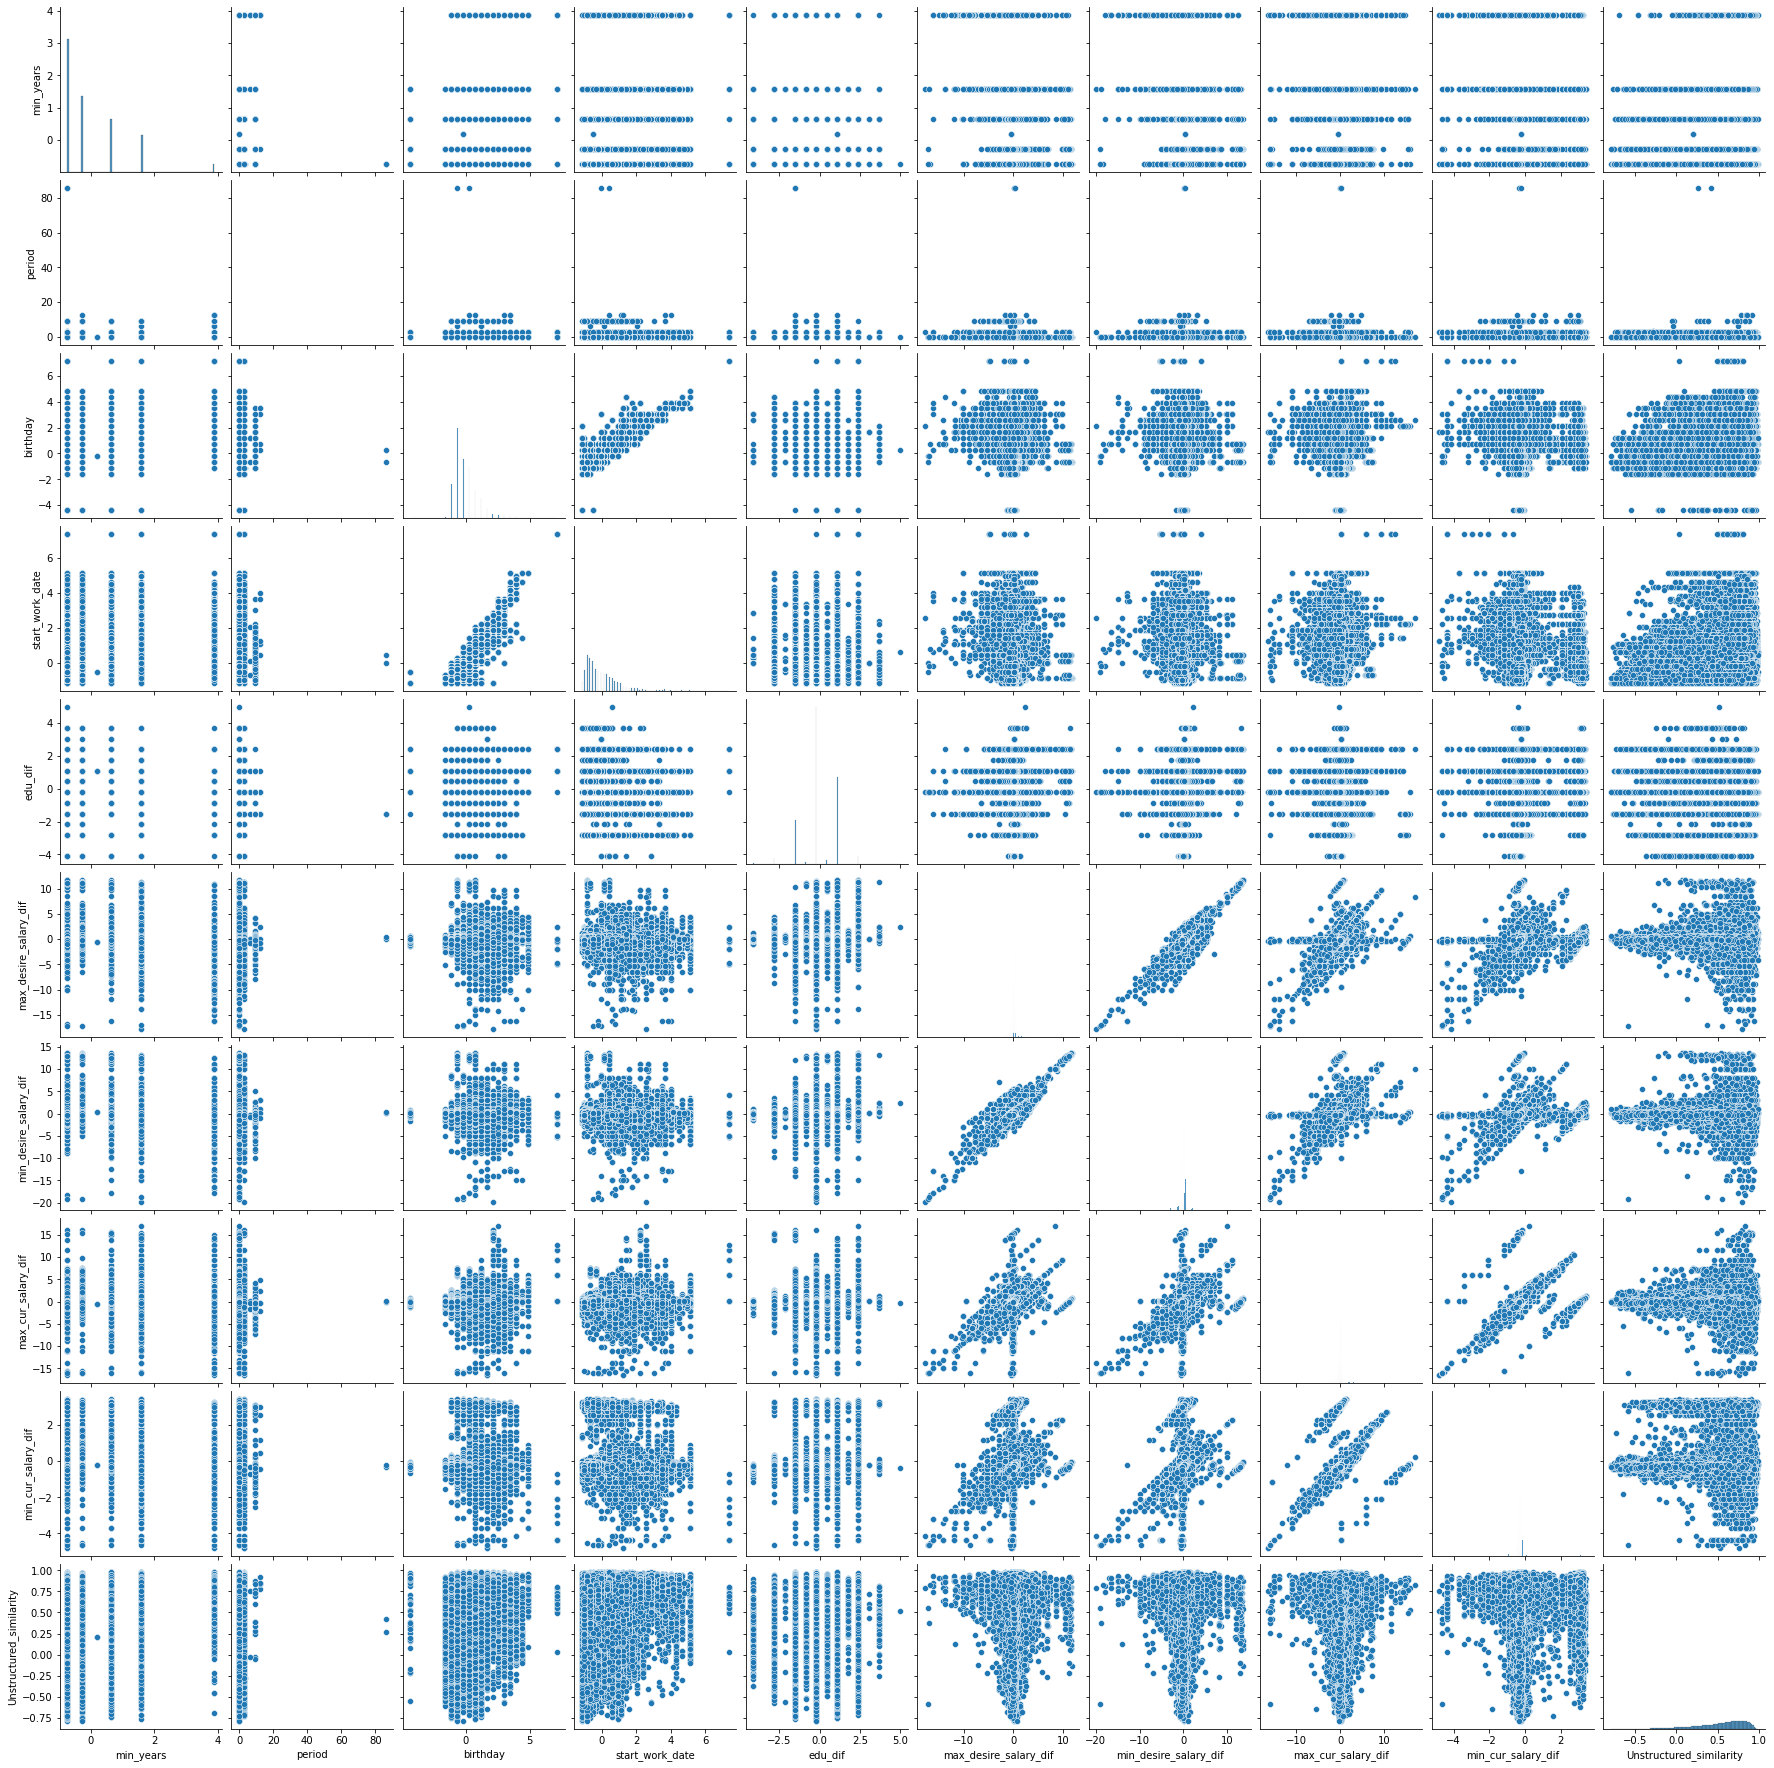

In [28]:
plt.figure(dpi=1000)
sns.pairplot(data[['min_years', 'period', 'birthday', 'start_work_date', 'edu_dif',
       'max_desire_salary_dif', 'min_desire_salary_dif', 'max_cur_salary_dif',
       'min_cur_salary_dif', 'Unstructured_similarity']])
plt.show

<AxesSubplot:>

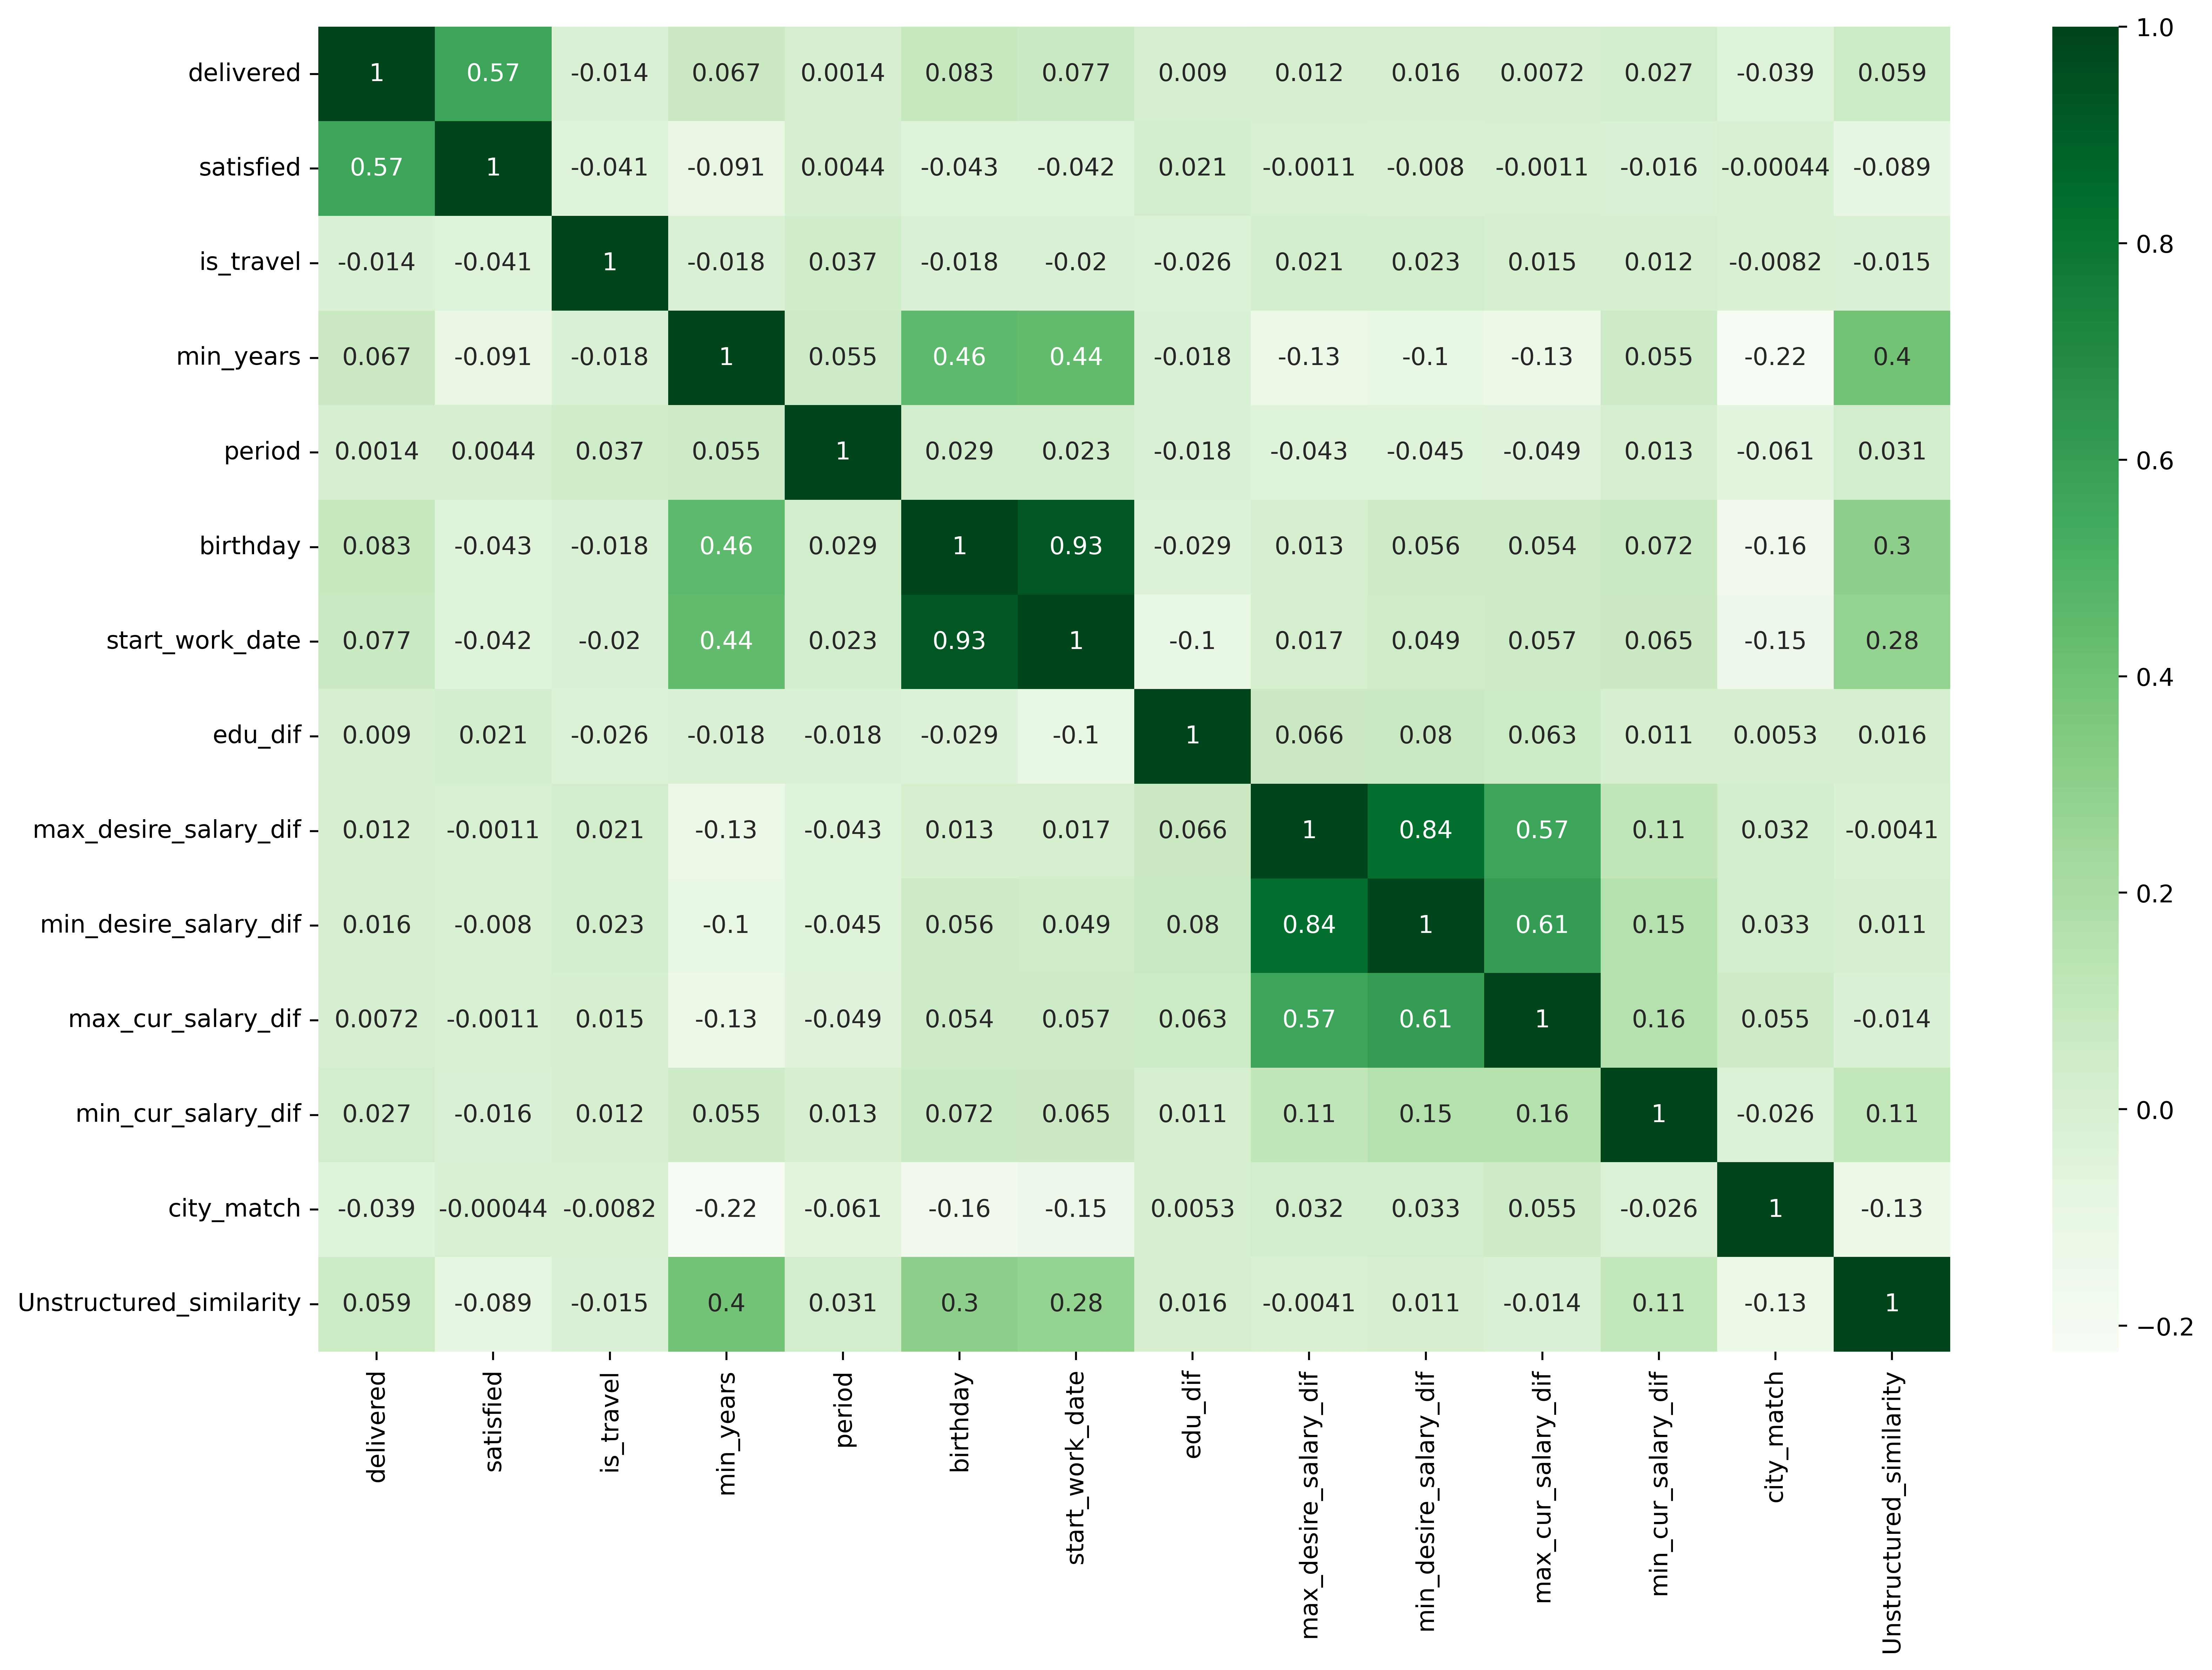

In [29]:
#数据间协方差矩阵&热力图
plt.figure(dpi=500,figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='Greens')